## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from modul import gravimetri
from modul import bc_model
from modul import hs_model
from modul import extraterrestrial_radiation

## Import Dataset

In [3]:
# Import file excel
data_primer = 'dataset primer/day (1).xlsx'
data_sekunder = 'dataset sekunder/dataset_sekunder.xlsx'

# Membaca semua sheet dari file Excel
# sheet_data_primer = pd.read_excel(data_primer, sheet_name=None)
sheet_data_sekunder = pd.read_excel(data_sekunder, sheet_name=None)

## Inisialisasi Variabel

Variabel Bebas

In [8]:
# Tanggal data analisis
date_data = "2024-10-22" # YYY, MM, DD

# Curah Hujan (mm/day)
# curah_hujan_harian = 

# BC Metode berdasarkan tabel persentasi hari terang
persentase_hari_terang = 0.28 # (okt: 0.28; nov: 0.29)

Variabel Kontrol

In [10]:
# Nama Sheet di file excel
# sheet_name = sheet_data_primer.keys()

# Latitude
latitude = -8.18

# Massa jenis air dalam kg/m^3
rho_air = 1000

sisi_media_tanaman = {
    'A1' : 12.5, 'A2' : 12.5, 'A3' : 12.5, 'A4' : 12.5, 'A5' : 12.5,
    'B1' : 15.0, 'B2' : 15.0, 'B3' : 15.0, 'B4' : 15.0, 'B5' : 15.0,
    'C1' : 17.5, 'C2' : 17.5, 'C3' : 17.5, 'C4' : 17.5, 'C5' : 17.5,
    'D1' : 20.0, 'D2' : 20.0, 'D3' : 20.0, 'D4' : 20.0, 'D5' : 20.0,
    'E1' : 22.5, 'E2' : 22.5, 'E3' : 22.5, 'E4' : 22.5, 'E5' : 22.5, 
    'F1' : 25.0, 'F2' : 25.0, 'F3' : 25.0, 'F4' : 25.0, 'F5' : 25.0, }


## Fungsi Perhitungan

In [ ]:
# Mencari luas area di dalam variabel
def luas_media():
    if sheet_name in sisi_media_tanaman:
        luas = sisi_media_tanaman[sheet_name] ** 2
        return luas

## ET Model Gravimetri/Penimbangan (Data Primer)

ET A1 : 0.25 mm/day
ET A2 : 0.25 mm/day
ET A3 : 0.25 mm/day
ET A4 : 0.25 mm/day
ET B1 : 0.0 mm/day
ET B2 : 0.0 mm/day
ET B3 : 0.0 mm/day
ET B4 : 0.0 mm/day
ET C1 : 0.5 mm/day
ET C2 : 0.5 mm/day
ET C3 : 0.5 mm/day
ET C4 : 0.5 mm/day
ET D1 : 0.5 mm/day
ET D2 : 0.5 mm/day
ET D3 : 0.5 mm/day
ET D4 : 0.5 mm/day
ET E1 : 1.0 mm/day
ET E2 : 1.0 mm/day
ET E3 : 1.0 mm/day
ET E4 : 1.0 mm/day
ET F1 : 1.0 mm/day
ET F2 : 1.0 mm/day
ET F3 : 1.0 mm/day
ET F4 : 1.0 mm/day


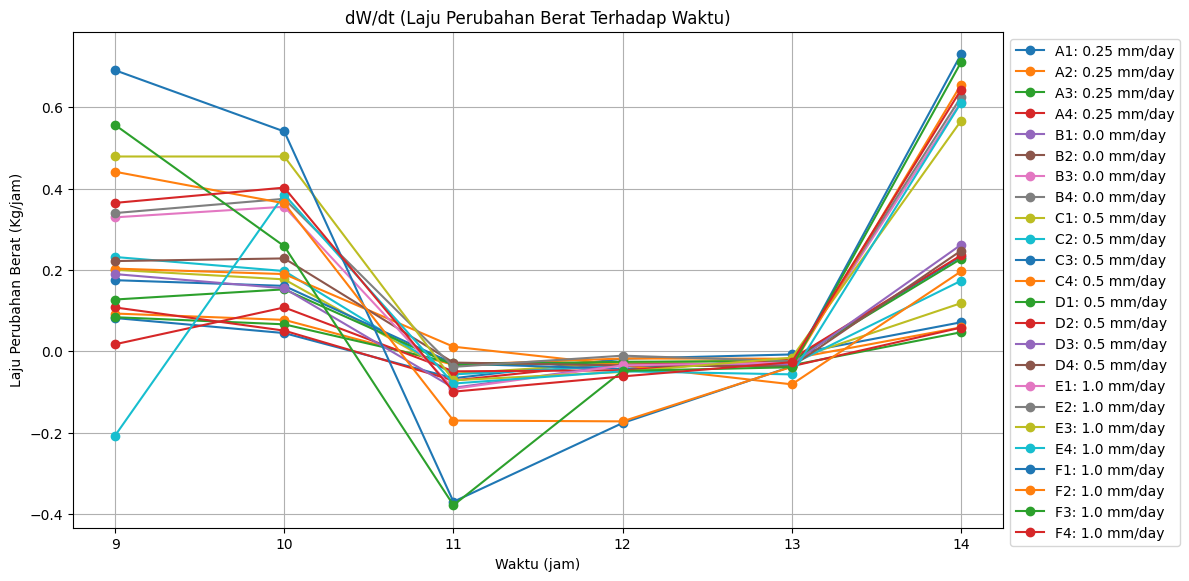

In [ ]:
plt.figure(figsize=(12, 6))

for sheet_name, data in sheet_data_primer.items():
    # memasukkan nilai dataset ke dalam variabel
    waktu = np.array(data['waktu'])
    # print(f"Waktu: {waktu}")
    berat = np.array(data['berat'])
    # print(f"Berat: {berat}")
    irigasi = np.array(data['supply_air'])
    # print(f"Irigasi: {irigasi}")

    # Mencari luas area di dalam variabel
    luas_media_tanaman = luas_media()
    # print(luas_media_tanaman)

    # Total irigasi harian
    total_irigasi = np.nansum(irigasi)
    # print(total_irigasi)

    # Menghitung laju perubahan berat dan evapotranspirasi menggunakan fungsi gravimetri
    laju_perubahan_berat, laju_et, et = gravimetri(berat, waktu, luas_media_tanaman, curah_hujan_harian, irigasi, rho_air)
    print(f"ET {sheet_name} : {et:.5} mm/day")

    # Menambahkan plot untuk setiap iterasi (sheet_name) dalam satu figure
    plt.plot(waktu[1:-1], laju_perubahan_berat, marker='o', linestyle='-', label=f"{sheet_name}: {et:.4} mm/day")

# Menambahkan elemen-elemen grafik setelah for loop selesai
plt.title("dW/dt (Laju Perubahan Berat Terhadap Waktu)")
plt.xlabel("Waktu (jam)")
plt.ylabel("Laju Perubahan Berat (Kg/jam)")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Menempatkan legenda di sebelah kanan
plt.tight_layout()  # Menghindari tumpang tindih elemen plot
plt.show()

## ET Model Blaney-Criddle (Data Sekunder)

In [ ]:
for sheet_name, data in sheet_data_sekunder.items():
    # Memasukkan nilai dataset ke dalam variabel
    suhu_udara = np.array(data['suhu_udara'])

    # Menghitung rata-rata suhu udara
    mean_suhu_udara = np.mean(suhu_udara)
    print(f"Rata-rata suhu udara: {mean_suhu_udara}")

    # Menghitung ET dengan model Blaney-Criddle
    et_model_bc = bc_model(persentase_hari_terang, mean_suhu_udara)
    print(f"\nET Blaney-Criddle: {et_model_bc}")

Rata-rata suhu udara: 26.48130434782609

ET Blaney-Criddle: 5.650792000000002


## ET Model Hargreavest-Samani (Data Sekunder)

In [11]:
for sheet_name, data in sheet_data_sekunder.items():
    # Memasukkan nilai dataset ke dalam variabel
    suhu_udara = np.array(data['suhu_udara'])
    # radiasi_matahari = np.array(data['radiasi_matahari'])

    print(date_data)
    
    # Menghitung rata-rata, max, min, dan rentang suhu udara
    # mean_radiasi_matahari = np.mean(radiasi_matahari)
    # print(f"Rata-rata radiasi matahari: {mean_radiasi_matahari}")
    max_suhu_udara = np.max(suhu_udara)
    print(f"Maksimal suhu udara: {max_suhu_udara}")
    min_suhu_udara = np.min(suhu_udara)
    print(f"Minimal suhu udara: {min_suhu_udara}")
    rentang_suhu_udara = max_suhu_udara - min_suhu_udara
    print(f"Rentang suhu udara: {rentang_suhu_udara}")
    mean_suhu_udara = (max_suhu_udara + min_suhu_udara) / 2
    print(f"Rata-rata suhu udara: {mean_suhu_udara}")

    Ra = extraterrestrial_radiation(latitude, date_data)
    print(f"Radiasi atmosfer: {Ra}")
    
    # Menghitung ET dengan model Hargreaves-Samani
    et_model_hs = hs_model(max_suhu_udara, min_suhu_udara, mean_suhu_udara, Ra)
    print(f"\nET Hargreaves-Samani: {et_model_hs}")

2024-10-22
Maksimal suhu udara: 32.36
Minimal suhu udara: 24.94
Rentang suhu udara: 7.419999999999998
Rata-rata suhu udara: 28.65
Radiasi atmosfer: 15.76067639015522

ET Hargreaves-Samani: 1.576359910503003
2024-10-22
Maksimal suhu udara: 33.47
Minimal suhu udara: 25.65
Rentang suhu udara: 7.82
Rata-rata suhu udara: 29.56
Radiasi atmosfer: 15.76067639015522

ET Hargreaves-Samani: 1.9677856897745754
2024-10-22
Maksimal suhu udara: 33.64
Minimal suhu udara: 25.69
Rentang suhu udara: 7.949999999999999
Rata-rata suhu udara: 29.665
Radiasi atmosfer: 15.76067639015522

ET Hargreaves-Samani: 2.0964705480807613
2024-10-22
Maksimal suhu udara: 33.05
Minimal suhu udara: 25.68
Rentang suhu udara: 7.369999999999997
Rata-rata suhu udara: 29.365
Radiasi atmosfer: 15.76067639015522

ET Hargreaves-Samani: 1.5579515065619338
2024-10-22
Maksimal suhu udara: 33.07
Minimal suhu udara: 25.59
Rentang suhu udara: 7.48
Rata-rata suhu udara: 29.33
Radiasi atmosfer: 15.76067639015522

ET Hargreaves-Samani: 1.65